In [8]:
# Import models and utility functions
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from data_processing import preprocess_data
# Load the dataset
data = pd.read_csv('dementia_dataset.csv')

# Preprocess the data (excluding any non-feature columns like IDs or target variable)
X = preprocess_data(data.iloc[:, 3:])  # Assuming the first two columns are non-features
y = data.iloc[:, 2]  

def gbc_model(X,y):
  # Setting SEED for reproducibility
  SEED = 23
  
  # Splitting dataset
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = SEED)
  
  # Instantiate Gradient Boosting Regressor
  gbc = GradientBoostingClassifier(n_estimators=300,learning_rate=0.05,random_state=100,max_features=5 )
  # Fit to training set
  gbc.fit(X_train, y_train)
  
  # Predict on test set
  y_pred = gbc.predict(X_test)
  
  # Get unique classes from y for target_names, converted to string
  target_names = [str(label) for label in np.unique(y)]

  # Print the classification report
  print(classification_report(y_test, y_pred, target_names=target_names, labels=np.unique(y)))
  return gbc

gbc=gbc_model(X,y)

              precision    recall  f1-score   support

   Converted       0.86      0.55      0.67        11
    Demented       0.97      1.00      0.99        38
 Nondemented       0.92      0.98      0.95        45

    accuracy                           0.94        94
   macro avg       0.92      0.84      0.87        94
weighted avg       0.93      0.94      0.93        94



In [9]:
from data_processing import select_chi_square_features
X=select_chi_square_features(X,y)

gbc=gbc_model(X,y)

from data_processing import k_fold_cross_validation
k_fold_cross_validation(gbc,X,y)

Selected Features Based on Chi-Square Test:
      Feature  Chi-Square Score
1   MR Delay       8730.156849
7        CDR        126.044030
6       MMSE         68.626076
8       eTIV         28.153708
2        M/F         14.399209
4       EDUC         14.324485
5        SES         12.711373
3        Age          4.695928
0      Visit          2.892589
9       nWBV          0.070393
10       ASF          0.012210
              precision    recall  f1-score   support

   Converted       0.86      0.55      0.67        11
    Demented       0.97      1.00      0.99        38
 Nondemented       0.92      0.98      0.95        45

    accuracy                           0.94        94
   macro avg       0.92      0.84      0.87        94
weighted avg       0.93      0.94      0.93        94

Accuracy scores for each fold: [0.8933333333333333, 0.9066666666666666, 0.9066666666666666, 0.9594594594594594, 0.9459459459459459]
Average accuracy across 5 folds: 0.9224

Aggregated Classification Rep

0.9224144144144143

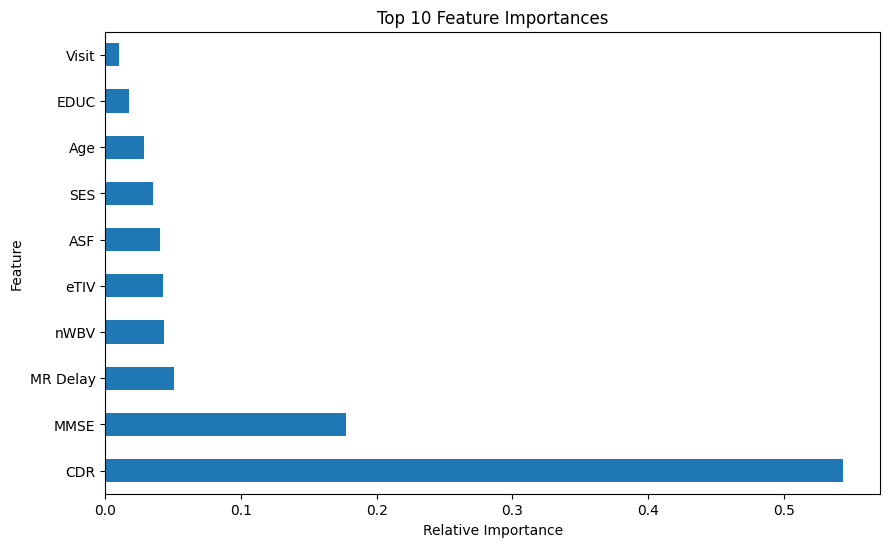

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
feat_importances = pd.Series(gbc.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [3, 5, 'sqrt']
}

# Initialize the model
gbc = GradientBoostingClassifier(random_state=100)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = SEED)
  
# Fit to training data
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found: ", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500}
              precision    recall  f1-score   support

   Converted       0.67      0.18      0.29        11
    Demented       0.90      1.00      0.95        38
 Nondemented       0.90      0.98      0.94        45

    accuracy                           0.89        94
   macro avg       0.82      0.72      0.72        94
weighted avg       0.87      0.89      0.87        94

